In [8]:
# magiczna linijka, żeby wykresy się rysowały bezpośrednio w dokumencie
%matplotlib inline

## Regresja liniowa

<!-- -->1. W pliku __ex1.csv__ znajdują się dane, których będziemy używać w dalszej części ćwiczeń. Pierwsza kolumna to losowa liczba, druga wartość oznacza jak bardzo prowadzący ją lubi. Estymować będziemy lubienie przez prowadzącego. Na początek dane należy wczytać. Można użyć biblioteki _pandas_, można to zrobić bezpośrednio.

In [6]:
import numpy as np
import pandas

X = []
Y = []

# Wczytywanie
data = pandas.read_csv("ex1.csv", header=None)
X = data[0]
Y = data[1]

# Na końcu upewnijmy się, że bawimy się z numpyowymi wektorami 
N = len(X)
X = np.array(X)
Y = np.array(Y)
X = X.reshape((N, 1))
Y = Y.reshape((N, 1))

<!-- -->2. Mając już wczytane dane warto na nie popatrzeć czujnym okiem. Przy pomocy biblioteki matplotlib narysuj wykres z wcześniej wczytanymi danymi.

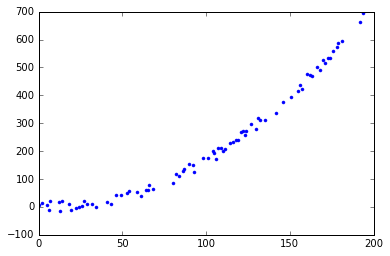

In [9]:
import matplotlib.pyplot as plt


plt.plot(X, Y, '.')
plt.show()

<!-- --> 3. Przejdźmy do meritum. Zaimplementujmy szukanie regresji liniowej metodą najmniejszych kwadratów. Dla ułatwienia przyjmijmy, że operujemy na płaszczyźnie dwuwymiarowej, więc rozważamy rozwiązania postaci: $$\theta_0 + \theta_1 x$$

In [77]:
def cost(theta, x, y):
    cost = 0.
    # theta: [b, a] -> f(x) = b + ax
    a = theta[1]
    b = theta[0]
    N = len(x)
    for _x, _y in zip(x, y):
        cost += (a*_x[0] + b - _y[0]) ** 2
    return cost/N

def gradient_step(theta, x, y, alpha):
    new_theta = []
    # theta: [b, a] -> f(x) = b + ax
    a = theta[1]
    b = theta[0]
    N = len(x)
    
    delta_a = 0.
    delta_b = 0.
    
    for _x, _y in zip(x, y):
        delta_a += (a*_x[0] + b - _y[0])*_x[0]*(2./N)
        delta_b += (a*_x[0] + b - _y[0])*(2./N)
        
    a = a - alpha*delta_a
    b = b - alpha*delta_b
    
    new_theta = [b, a]
    return new_theta
    
def gradient_descent(theta, x, y, alpha, steps):
    for i in range(steps):
        if i%100 == 0:
            print "Current cost: ", cost(theta, x, y)
        theta = gradient_step(theta, x, y, alpha)
        
    return theta

<!-- --> 4. Sprawdź swój kod w boju! 
1. Podziel dane na zbiór uczący i testowy (np. w stosunku 3:1). Pamiętaj, że na początku dane warto losowo wymieszać. Przy pomocy napisanych wcześniej funkcji wytrenuj model i porównaj wartość błędu dla obu zbiorów. Jak zmieniają się wyniki w zależności od parametrów alpha i liczby iteracji?
2. Na jednym wykresie pokaż zarówno dane wejściowe jak i znalezioną funkcję.


Current cost:  91457.13936
Current cost:  6014.63758819
Current cost:  6011.7755804
Current cost:  6008.91683528
Current cost:  6006.06134913
Current cost:  6003.20911821
Current cost:  6000.36013883
Current cost:  5997.51440727
Current cost:  5994.67191984
Current cost:  5991.83267283
Training cost:  5988.99666255
Test cost:  6588.39741443


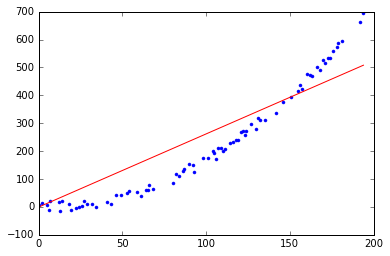

In [150]:
import random

initial_theta = np.zeros(2)

# Wymieszajmy dane wejściowe. Ten krok nie jest konieczny, ale to bardzo dobry nawyk
merged = zip(X, Y)
random.shuffle(merged)
shuffled_X, shuffled_Y = zip(*merged)

N = len(shuffled_X)

x_train = np.array(shuffled_X[:N*3/4])
y_train = np.array(shuffled_Y[:N*3/4])

x_test = np.array(shuffled_X[N*3/4:])
y_test = np.array(shuffled_Y[N*3/4:])

theta = gradient_descent(initial_theta, x_train, y_train, 0.00001, 1000)

print "Training cost: ", cost(theta, x_train, y_train)
print "Test cost: ", cost(theta, x_test, y_test)


# plot all the data!
# ...
plt.plot(X, Y, 'b.')

est_x = np.linspace(min(X), max(X))
est_y = [theta[1]*x + theta[0] for x in est_x]
plt.plot(est_x, est_y, 'r')
plt.show()

<!-- --> 5. Uogólnij swój kod tak, aby działał niezależnie od liczby featurów. Dodatkowe punkty uzyskasz, jeśli operacje będą zwektoryzowane przy pomocy biblioteki _numpy_. (tj. zamiast pętli będą operacje na _numpy.array_). Sprawdź, czy wyniki wciąż są satysfakcjonujące wykonując ponownie zadanie __4__.

Pomocny artykuł: [regresja liniowa na macierzach](https://www.stat.cmu.edu/~cshalizi/mreg/15/lectures/13/lecture-13.pdf)

Current cost:  91457.13936
Current cost:  6016.06981902
Current cost:  6014.63759227
Current cost:  6013.20618235
Current cost:  6011.77558855
Current cost:  6010.34581043
Current cost:  6008.9168475
Current cost:  6007.48869932
Current cost:  6006.0613654
Current cost:  6004.6348453
Training cost:  6003.20913854
Test cost:  6603.29894469


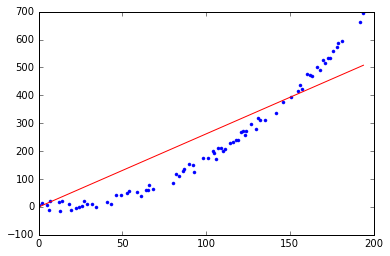

In [164]:
def vec_cost(theta, x, y):
    N = len(x)
    difference = np.dot(x, theta.transpose()) - y
    return np.sum(difference**2/N)
 
def vec_gradient_step(theta, x, y, alpha):
    N = len(x)
    difference = np.dot(x, theta.transpose()) - y
    return theta-np.sum(difference * x, axis=0)*alpha/N
 
def vec_gradient_descent(theta, x, y, alpha, steps):
    for i in range(steps):
        if i%100 == 0:
            print "Current cost: ", vec_cost(theta, x, y)
        theta = vec_gradient_step(theta, x, y, alpha)
    return theta
 
# mała sztuczka - dorzucamy 
def add_column_of_ones(matrix):
    ones = np.ones((len(matrix), 1))
    return np.append(ones, matrix, axis=1)
    
theta = vec_gradient_descent(np.zeros((2,1)).reshape((1, 2)), add_column_of_ones(x_train), y_train, 0.00001, 1000)

print "Training cost: ", vec_cost(theta, add_column_of_ones(x_train), y_train)
print "Test cost: ", vec_cost(theta, add_column_of_ones(x_test), y_test)


# plot all the data!
# ...
plt.plot(X, Y, 'b.')

est_x = np.linspace(min(X), max(X))
est_y = [theta[0][1]*x + theta[0][0] for x in est_x]
plt.plot(est_x, est_y, 'r')
plt.show()

<!-- --> 6. Na koniec postarajmy się zrobić to lepiej. Na potrzeby trenowania modelu wzbogać zbiór featurów o dodatkową kolumnę - kwadrat wartości. Porównaj wartości błędów i wykresy dla zwykłych danych i tych wzbogaconych.

Current cost:  91457.13936
Current cost:  51582.5805376
Current cost:  29121.7570484
Current cost:  16469.8655407
Current cost:  9343.21860448
Current cost:  5328.87050276
Current cost:  3067.6400975
Current cost:  1793.91822567
Current cost:  1076.44714381
Current cost:  672.304940508
Training cost:  444.656843663
Test cost:  323.787670565


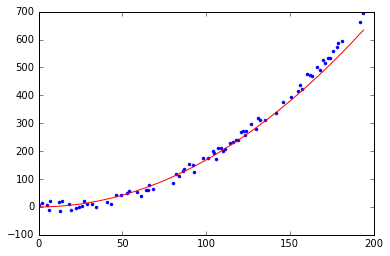

In [163]:
def add_poly_features(x):
    return np.append(x, x*x, axis=1)

theta = vec_gradient_descent(np.zeros((3,1)).reshape((1,3)), add_column_of_ones(add_poly_features(x_train)), y_train, 0.00000000001, 1000)

print "Training cost: ", vec_cost(theta, add_column_of_ones(add_poly_features(x_train)), y_train)
print "Test cost: ", vec_cost(theta, add_column_of_ones(add_poly_features(x_test)), y_test)


# plot all the data!
# ...
plt.plot(X, Y, 'b.')

est_x = np.linspace(min(X), max(X))
est_y = [theta[0][2]*x*x + theta[0][1]*x + theta[0][0] for x in est_x]
plt.plot(est_x, est_y, 'r')
plt.show()